In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import shutil
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, MaxPool2D
from tensorflow.keras.optimizers import Adam
from google.colab import drive
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model

In [48]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
data_dir = '/content/drive/MyDrive/dogs_and_cats'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test', 'allimages')

In [50]:
cat_source_dir = os.path.join(train_dir, 'cat')
dog_source_dir = os.path.join(train_dir, 'dog')

In [51]:
image_size = (224, 224)
batch_size = 32

In [52]:
def sample_images(source_dir, num_images):
    image_files = [f for f in os.listdir(source_dir) if f.lower().endswith(('jpg', 'jpeg', 'png'))]
    random.shuffle(image_files)
    sampled_files = image_files[:num_images]
    return sampled_files

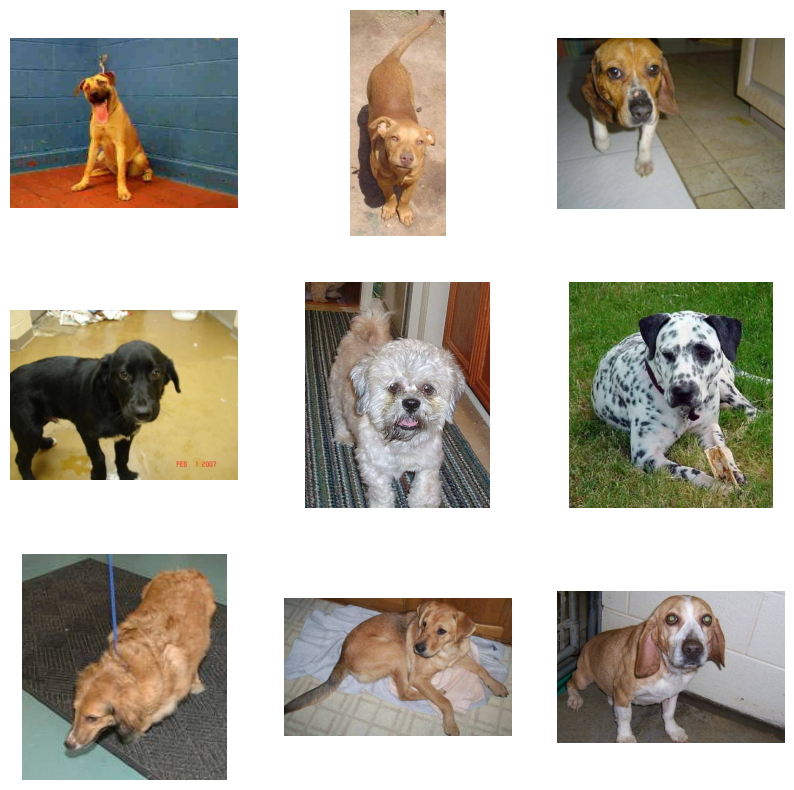

In [53]:
dog_subfolder = os.path.join(data_dir, "train/dog")

dog_image_files = os.listdir(dog_subfolder)

dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    dog_images.append(img_array)

# Display the images using matplotlib
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

for i in range(9):
    axes[i].imshow(dog_images[i])
    axes[i].axis('off')

plt.show()

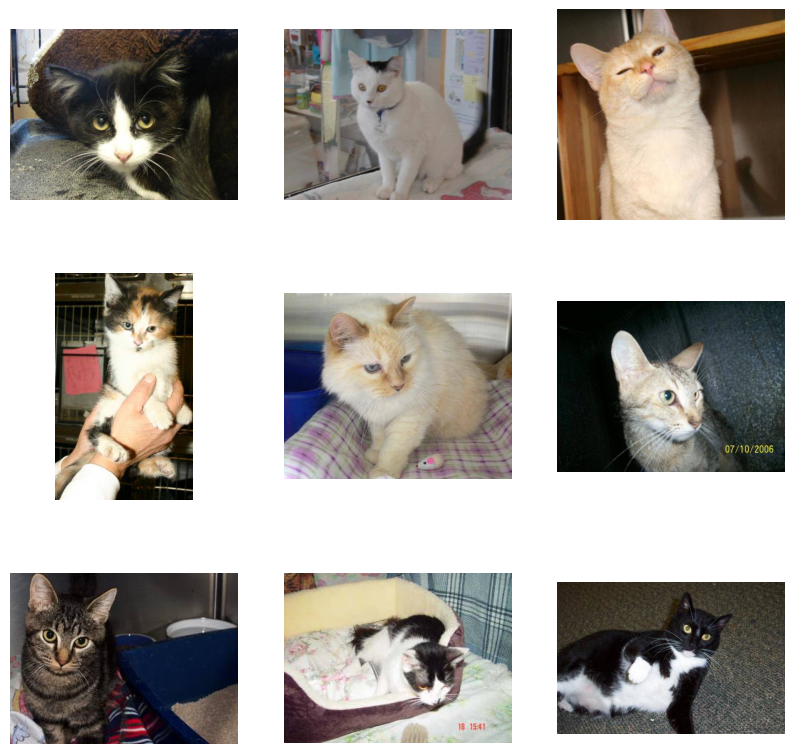

In [54]:
cat_subfolder = os.path.join(data_dir, "train/cat")

cat_image_files = os.listdir(cat_subfolder)

cat_images = []
for i in range(9):
    img_path = os.path.join(cat_subfolder, cat_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    cat_images.append(img_array)

# Display the images using matplotlib
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

for i in range(9):
    axes[i].imshow(cat_images[i])
    axes[i].axis('off')

plt.show()

In [55]:
trainsize=1000
testsize=500

In [56]:
train_cat= sample_images(cat_source_dir, trainsize // 2)
train_dog= sample_images(dog_source_dir, trainsize // 2)

In [57]:
def create_train_generator(train_cat,train_dog):
  temp_train= "/content/dogs_and_cats/temp_train"
  temp_cat_dir=os.path.join(temp_train,"cat")
  temp_dog_dir=os.path.join(temp_train,"dog")

  os.makedirs(temp_cat_dir, exist_ok=True)
  os.makedirs(temp_dog_dir, exist_ok=True)

  for img in train_cat:
    shutil.copy(os.path.join(cat_source_dir,img),os.path.join(temp_cat_dir))

  for img in train_dog:
    shutil.copy(os.path.join(dog_source_dir,img),os.path.join(temp_dog_dir))

  return temp_train

In [58]:
train_datagen= ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [59]:
temp_train_dir=create_train_generator(train_cat,train_dog)

In [62]:
train_generator=train_datagen.flow_from_directory(
    directory=temp_train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="binary",
    shuffle=True
)

Found 1000 images belonging to 2 classes.


In [65]:
test_images=sample_images(test_dir,testsize)

In [66]:
test_image_arrays = []
for img_file in test_images:
    img_path = os.path.join(test_dir, img_file)
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img) / 255.0  # Normalize the image
    test_image_arrays.append(img_array)

In [67]:
test_data = np.array(test_image_arrays)
print(f"Loaded {len(test_data)} test images")
print(f"Shape of test data: {test_data.shape}")

Loaded 500 test images
Shape of test data: (500, 224, 224, 3)


In [68]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))  # Binary classification: 1 output neuron

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [70]:
checkpoint = ModelCheckpoint(filepath="/content/drive/MyDrive/Dog vs Cat/saved_models/vgg16_1.keras", save_best_only=True)
early_stopping = EarlyStopping(patience=3)

In [71]:
hist = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Adjust epochs as needed
    callbacks=[checkpoint, early_stopping],
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 2243s 72s/step - accuracy: 0.4768 - loss: 0.6937
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 72s 2ms/step - accuracy: 0.4688 - loss: 0.6932  
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2205s 71s/step - accuracy: 0.4947 - loss: 0.6932
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 73s 508us/step - accuracy: 0.3438 - loss: 0.6939
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2221s 71s/step - accuracy: 0.4769 - loss: 0.6932
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 70s 757us/step - accuracy: 0.5312 - loss: 0.6931
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2193s 70s/step - accuracy: 0.5257 - loss: 0.6932
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 71s 664us/step - accuracy: 0.5000 - loss: 0.6931
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2224s 70s/step - accuracy: 0.4969 - loss: 0.6932
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 74s 581us/step - accuracy: 0.5000 - loss: 0.6931


In [72]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 402,793,925 (1.50 GB)

 Trainable params: 134,264,641 (512.18 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 268,529,284 (1.00 GB)

In [73]:
predictions = model.predict(test_data)


16/16 ━━━━━━━━━━━━━━━━━━━━ 334s 20s/step


In [74]:
for i, pred in enumerate(predictions):
    label = 'Dog' if pred[0] > 0.6 else 'Cat'
    print(f"Image: {test_images[i]}, Prediction: {label}, Confidence: {pred[0]:.2f}")

Image: 3475.jpg, Prediction: Cat, Confidence: 0.50
Image: 6765.jpg, Prediction: Cat, Confidence: 0.50
Image: 7952.jpg, Prediction: Cat, Confidence: 0.50
Image: 12393.jpg, Prediction: Cat, Confidence: 0.50
Image: 7864.jpg, Prediction: Cat, Confidence: 0.50
Image: 9091.jpg, Prediction: Cat, Confidence: 0.50
Image: 1583.jpg, Prediction: Cat, Confidence: 0.50
Image: 10315.jpg, Prediction: Cat, Confidence: 0.50
Image: 12263.jpg, Prediction: Cat, Confidence: 0.50
Image: 1645.jpg, Prediction: Cat, Confidence: 0.50
Image: 7165.jpg, Prediction: Cat, Confidence: 0.50
Image: 238.jpg, Prediction: Cat, Confidence: 0.50
Image: 9870.jpg, Prediction: Cat, Confidence: 0.50
Image: 636.jpg, Prediction: Cat, Confidence: 0.50
Image: 967.jpg, Prediction: Cat, Confidence: 0.50
Image: 5671.jpg, Prediction: Cat, Confidence: 0.50
Image: 4795.jpg, Prediction: Cat, Confidence: 0.50
Image: 6224.jpg, Prediction: Cat, Confidence: 0.50
Image: 10695.jpg, Prediction: Cat, Confidence: 0.50
Image: 10644.jpg, Prediction: 